In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch, cv2, gdal, georaster
import sys, os, json, math, osr
from PIL import Image
%matplotlib inline

In [2]:
def load_tiff(fname):
    tiff = gdal.Open(fname, gdal.GA_ReadOnly)
    arr = [tiff.GetRasterBand(idx).ReadAsArray() for idx in range(1, tiff.RasterCount+1)]
    return np.dstack(arr)

In [3]:
fname='../../Hong Kong Test/hk.tif'

In [4]:
img = load_tiff(fname).squeeze()

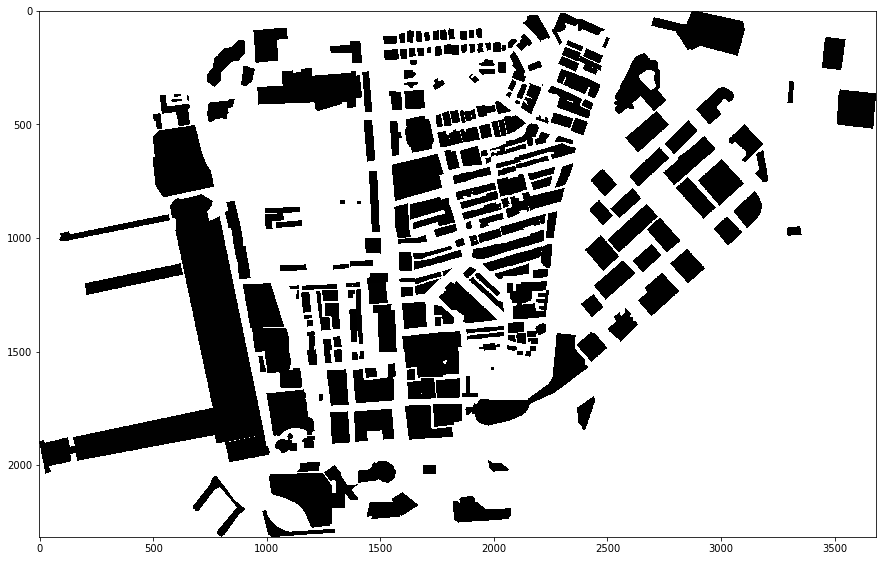

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')

In [14]:
tiff = gdal.Open(fname, gdal.GA_ReadOnly)

In [19]:
ds = gdal.Open(fname)
old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs .ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs) 

#get the point to transform, pixel (0,0) in this case
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 

#get the coordinates in lat long
latlong = transform.TransformPoint(10, 20)

In [24]:
for (x,y) in [(0,0), (width-1, 0), (width-1, height-1), (0, height-1)]:
    latlon = transform.TransformPoint(x,y)
    print("x:",x,"y:",y, "\t\tlat:",latlon[0],"lon:",latlon[1])

x: 0 y: 0 		lat: 106.42793332859826 lon: 14.781416619029274
x: 3684 y: 0 		lat: 106.46183812273743 lon: 14.782559825310782
x: 3684 y: 2315 		lat: 106.46110082574032 lon: 14.80329137709587
x: 0 y: 2315 		lat: 106.4271928714091 lon: 14.8021464967207


In [5]:
Image.open(fname)

OSError: cannot identify image file '../../Hong Kong Test/hk.tif'